In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('CNN_WithTime_Offset_5_Trial_1.csv', header=0)
trial2_results = pd.read_csv('CNN_WithTime_Offset_5_Trial_2.csv', header=0)
trial3_results = pd.read_csv('CNN_WithTime_Offset_5_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,1.0,10.0000,900.0
2,3.0,2.0,10.0000,1700.0
3,4.0,2.0,6.7809,2500.0
4,5.0,2.0,6.6914,3300.0
...,...,...,...,...
3001,3002.0,7.0,5.5726,387900.0
3002,3003.0,7.0,5.5726,387400.0
3003,3004.0,7.0,5.5726,386900.0
3004,3005.0,7.0,5.5726,386400.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,1.0,10.0000,1900.0
3,4.0,1.0,6.7253,2800.0
4,5.0,1.0,5.7798,3700.0
...,...,...,...,...
3001,3002.0,8.0,5.1896,351200.0
3002,3003.0,8.0,5.1896,348200.0
3003,3004.0,8.0,5.1896,345200.0
3004,3005.0,8.0,5.1896,342200.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,1.0,6.2974,2900.0
4,5.0,1.0,5.8639,3800.0
...,...,...,...,...
3001,3002.0,5.0,5.5438,595700.0
3002,3003.0,5.0,5.5438,595200.0
3003,3004.0,5.0,5.5438,594700.0
3004,3005.0,0.0,5.5438,595700.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,900.0,1000.0,1000.0
2,1700.0,1900.0,2000.0
3,2500.0,2800.0,2900.0
4,3300.0,3700.0,3800.0
...,...,...,...
2995,386000.0,365700.0,595900.0
2996,385500.0,366200.0,596800.0
2997,386300.0,363200.0,597700.0
2998,387100.0,360200.0,597200.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,900.0,1000.0,1000.0,966.666667
2,1700.0,1900.0,2000.0,1866.666667
3,2500.0,2800.0,2900.0,2733.333333
4,3300.0,3700.0,3800.0,3600.000000
...,...,...,...,...
2995,386000.0,365700.0,595900.0,449200.000000
2996,385500.0,366200.0,596800.0,449500.000000
2997,386300.0,363200.0,597700.0,449066.666667
2998,387100.0,360200.0,597200.0,448166.666667


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,900.0,1000.0,1000.0,966.666667,57.735027
2,1700.0,1900.0,2000.0,1866.666667,152.752523
3,2500.0,2800.0,2900.0,2733.333333,208.166600
4,3300.0,3700.0,3800.0,3600.000000,264.575131
...,...,...,...,...,...
2995,386000.0,365700.0,595900.0,449200.000000,127450.735580
2996,385500.0,366200.0,596800.0,449500.000000,127930.019933
2997,386300.0,363200.0,597700.0,449066.666667,129237.391390
2998,387100.0,360200.0,597200.0,448166.666667,129765.570678


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 966.6666666666666,
 1866.6666666666667,
 2733.3333333333335,
 3600.0,
 4333.333333333333,
 3833.3333333333335,
 3800.0,
 4200.0,
 4566.666666666667,
 5433.333333333333,
 6200.0,
 6966.666666666667,
 7266.666666666667,
 7233.333333333333,
 7200.0,
 8033.333333333333,
 8200.0,
 7700.0,
 7333.333333333333,
 6933.333333333333,
 7866.666666666667,
 8766.666666666666,
 9133.333333333334,
 9466.666666666666,
 9433.333333333334,
 9866.666666666666,
 10300.0,
 10733.333333333334,
 11566.666666666666,
 11966.666666666666,
 12266.666666666666,
 13033.333333333334,
 13300.0,
 14066.666666666666,
 14800.0,
 15200.0,
 16000.0,
 16800.0,
 16633.333333333332,
 17400.0,
 17833.333333333332,
 18200.0,
 19000.0,
 19366.666666666668,
 19300.0,
 19700.0,
 20533.333333333332,
 20833.333333333332,
 21600.0,
 22000.0,
 22800.0,
 23066.666666666668,
 23800.0,
 22900.0,
 22000.0,
 22433.333333333332,
 23200.0,
 23600.0,
 24333.333333333332,
 23900.0,
 24800.0,
 25566.666666666668,
 25533.333333333332,
 2

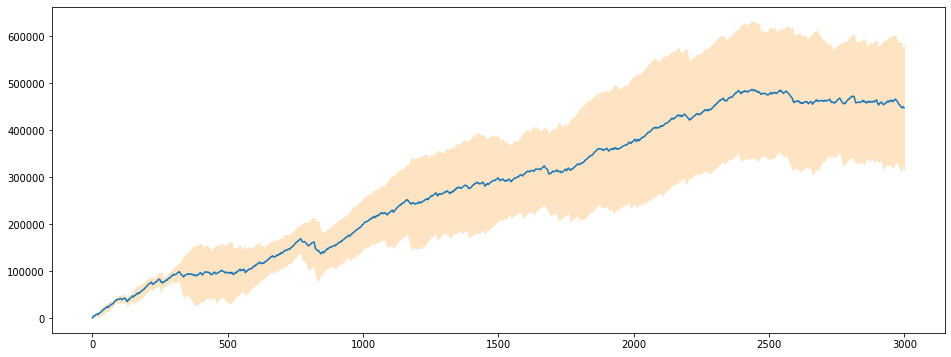

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 3.0,
 8.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 9.0,
 9.0,
 9.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 6.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

81

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,1.0,10.0000,900.0
2,3.0,2.0,10.0000,1700.0
3,4.0,2.0,6.7809,2500.0
4,5.0,2.0,6.6914,3300.0
...,...,...,...,...
2995,2996.0,3.0,4.8337,386000.0
2996,2997.0,7.0,4.8337,385500.0
2997,2998.0,2.0,4.8337,386300.0
2998,2999.0,2.0,4.8337,387100.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[19.0,
 55.0,
 56.0,
 106.0,
 107.0,
 108.0,
 109.0,
 173.0,
 174.0,
 219.0,
 220.0,
 221.0,
 222.0,
 223.0,
 251.0,
 252.0,
 253.0,
 254.0,
 322.0,
 384.0,
 385.0,
 386.0,
 402.0,
 403.0,
 404.0,
 405.0,
 406.0,
 407.0,
 408.0,
 532.0,
 559.0,
 771.0,
 772.0,
 773.0,
 774.0,
 775.0,
 776.0,
 777.0,
 778.0,
 820.0,
 821.0,
 822.0,
 823.0,
 824.0,
 825.0,
 871.0,
 952.0,
 1030.0,
 1044.0,
 1045.0,
 1046.0,
 1073.0,
 1074.0,
 1075.0,
 1111.0,
 1112.0,
 1113.0,
 1114.0,
 1189.0,
 1190.0,
 1191.0,
 1192.0,
 1193.0,
 1320.0,
 1321.0,
 1427.0,
 1428.0,
 1429.0,
 1462.0,
 1463.0,
 1519.0,
 1520.0,
 1521.0,
 1522.0,
 1523.0,
 1524.0,
 1525.0,
 1526.0,
 1542.0,
 1543.0,
 1544.0,
 1545.0,
 1546.0,
 1575.0,
 1683.0,
 1684.0,
 1685.0,
 1686.0,
 1687.0,
 1688.0,
 1806.0,
 1884.0,
 1885.0,
 1886.0,
 1887.0,
 1888.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2145.0,
 2146.0,
 2147.0,
 2175.0,
 2176.0,
 2177.

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

47

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 47
Number of instances in trial2 in state 8: 63
Number of instances in trial1 in state 8: 52
Average number of instances in state 8: 54.0


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 32
Number of instances in trial2 in state 9: 18
Number of instances in trial1 in state 9: 36
Average number of instances in state 9: 28.666666666666668


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 371 timesteps 0.1237 percentage of time in trial 1
Machine is in state 0 for 471 timesteps 0.1570 percentage of time in trial 2
Machine is in state 0 for 474 timesteps 0.1580 percentage of time in trial 3
Machine is in state 0 for 438.6667 timesteps 0.1462 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 592 timesteps 0.1973 percentage of time in trial 1
Machine is in state 1 for 526 timesteps 0.1753 percentage of time in trial 2
Machine is in state 1 for 585 timesteps 0.1950 percentage of time in trial 3
Machine is in state 1 for 567.6667 timesteps 0.1892 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 667 timesteps 0.2223 percentage of time in trial 1
Machine is in state 2 for 641 timesteps 0.2137 percentage of time in trial 2
Machine is in state 2 for 634 timesteps 0.2113 percentage of time in trial 3
Machine is in state 2 for 647.3333 timesteps 0.2158 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 299 timesteps 0.0997 percentage of time in trial 1
Machine is in state 3 for 322 timesteps 0.1073 percentage of time in trial 2
Machine is in state 3 for 298 timesteps 0.0993 percentage of time in trial 3
Machine is in state 3 for 306.3333 timesteps 0.1021 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 22 timesteps 0.0073 percentage of time in trial 1
Machine is in state 4 for 57 timesteps 0.0190 percentage of time in trial 2
Machine is in state 4 for 45 timesteps 0.0150 percentage of time in trial 3
Machine is in state 4 for 41.3333 timesteps 0.0138 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 108 timesteps 0.0360 percentage of time in trial 1
Machine is in state 5 for 101 timesteps 0.0337 percentage of time in trial 2
Machine is in state 5 for 116 timesteps 0.0387 percentage of time in trial 3
Machine is in state 5 for 108.3333 timesteps 0.0361 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 219 timesteps 0.0730 percentage of time in trial 1
Machine is in state 6 for 228 timesteps 0.0760 percentage of time in trial 2
Machine is in state 6 for 187 timesteps 0.0623 percentage of time in trial 3
Machine is in state 6 for 211.3333 timesteps 0.0704 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 237 timesteps 0.0790 percentage of time in trial 1
Machine is in state 7 for 242 timesteps 0.0807 percentage of time in trial 2
Machine is in state 7 for 252 timesteps 0.0840 percentage of time in trial 3
Machine is in state 7 for 243.6667 timesteps 0.0812 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 210 timesteps 0.0700 percentage of time in trial 1
Machine is in state 8 for 267 timesteps 0.0890 percentage of time in trial 2
Machine is in state 8 for 175 timesteps 0.0583 percentage of time in trial 3
Machine is in state 8 for 217.3333 timesteps 0.0724 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 275 timesteps 0.0917 percentage of time in trial 1
Machine is in state 9 for 145 timesteps 0.0483 percentage of time in trial 2
Machine is in state 9 for 234 timesteps 0.0780 percentage of time in trial 3
Machine is in state 9 for 218.0000 timesteps 0.0727 percentage of time on average
